In [93]:
from binance_f.requestclient import RequestClient
from binance_f.constant.test import *
from binance_f.base.printobject import *
import pandas as pd
import numpy as np
import time
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style='white')

In [307]:
request_client = RequestClient()
limit=500
result = request_client.get_top_long_short_positions(symbol='ETHUSDT', period='5m', limit=limit)
result2 = request_client.get_global_long_short_accounts(symbol='ETHUSDT', period='5m', limit=limit)

[{"symbol":"ETHUSDT","longAccount":"0.4919","longShortRatio":"0.9680","shortAccount":"0.5081","timestamp":1636014900000},{"symbol":"ETHUSDT","longAccount":"0.4919","longShortRatio":"0.9680","shortAccount":"0.5081","timestamp":1636015200000},{"symbol":"ETHUSDT","longAccount":"0.4917","longShortRatio":"0.9675","shortAccount":"0.5083","timestamp":1636015500000},{"symbol":"ETHUSDT","longAccount":"0.4918","longShortRatio":"0.9676","shortAccount":"0.5082","timestamp":1636015800000},{"symbol":"ETHUSDT","longAccount":"0.4918","longShortRatio":"0.9676","shortAccount":"0.5082","timestamp":1636016100000},{"symbol":"ETHUSDT","longAccount":"0.4917","longShortRatio":"0.9675","shortAccount":"0.5083","timestamp":1636016400000},{"symbol":"ETHUSDT","longAccount":"0.4920","longShortRatio":"0.9685","shortAccount":"0.5080","timestamp":1636016700000},{"symbol":"ETHUSDT","longAccount":"0.4919","longShortRatio":"0.9683","shortAccount":"0.5081","timestamp":1636017000000},{"symbol":"ETHUSDT","longAccount":"0.49

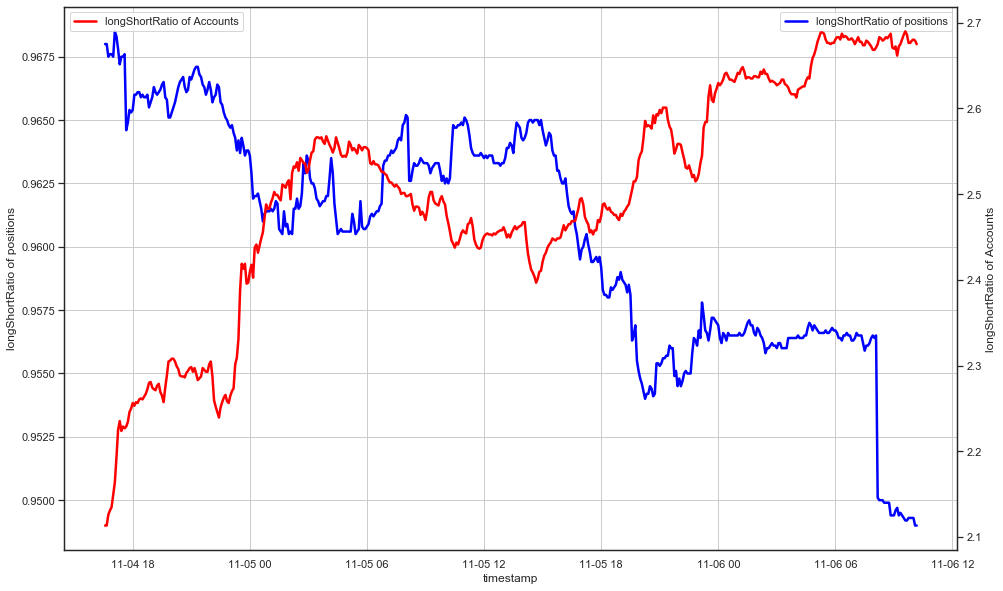

In [308]:
def timeStamp(timeNum): 
    timeStamp = float(timeNum/1000) 
    timeArray = time.localtime(timeStamp) 
    otherStyleTime = time.strftime("%Y-%m-%d %H:%M:%S", timeArray)
    return otherStyleTime
def json_to_df(obj):
    df = pd.DataFrame(t.__dict__ for t in obj)
    df['timestamp'] = df['timestamp'].apply(lambda x :timeStamp(int(x))).astype('datetime64[ns]')
    df.set_index('timestamp', inplace=True)
    return df
df = json_to_df(result)
df2 = json_to_df(result2)
f, ax1 = plt.subplots(figsize=(16,10))
ax1.grid(True)
ax2 = ax1.twinx()
sns.lineplot(data=df['longShortRatio'],  palette='tab10',color='blue', ax=ax1, linewidth=2.5,label='longShortRatio of positions')
sns.lineplot(data=df2['longShortRatio'], palette='tab10',color='red', ax=ax2, linewidth=2.5,label='longShortRatio of Accounts')
ax1.legend(loc=1)
ax2.legend(loc=2)
ax1.set_ylabel('longShortRatio of positions')
ax2.set_ylabel('longShortRatio of Accounts')
plt.show()

In [309]:
df

,symbol,longShortRatio,longAccount,shortAccount
timestamp,,,,
2021-11-04 16:35:00,ETHUSDT,0.9680,0.4919,0.5081
2021-11-04 16:40:00,ETHUSDT,0.9680,0.4919,0.5081
2021-11-04 16:45:00,ETHUSDT,0.9675,0.4917,0.5083
2021-11-04 16:50:00,ETHUSDT,0.9676,0.4918,0.5082
2021-11-04 16:55:00,ETHUSDT,0.9676,0.4918,0.5082
...,...,...,...,...
2021-11-06 09:50:00,ETHUSDT,0.9493,0.4870,0.5130
2021-11-06 09:55:00,ETHUSDT,0.9493,0.4870,0.5130
2021-11-06 10:00:00,ETHUSDT,0.9493,0.4870,0.5130
